In [1]:
cd C:\\Users\\abelr\\WORK\\GC_JAMES

C:\Users\abelr\WORK\GC_JAMES


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from netCDF4 import Dataset
# from haversine import haversine
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from cmocean import cm
from matplotlib import ticker
import xarray as xr

def cmap_discretize(cmap, n_colors):
    """Return a discrete colormap from the continuous colormap cmap.

    Parameters
    ----------
    cmap : str or colormap object
        Colormap to discretize.
    n_colors : int
        Number of discrete colors to divide `cmap` into.

    Returns
    ----------
    discrete_cmap : LinearSegmentedColormap
        Discretized colormap.
    """
    from matplotlib.colors import LinearSegmentedColormap
    import matplotlib.pyplot as plt

    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., n_colors), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., n_colors + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki])
                      for i in range(n_colors + 1)]
    # Return colormap object.
    return LinearSegmentedColormap(cmap.name + "_%d" % n_colors, cdict, 1024)

thermal_dis=cmap_discretize(cm.thermal,10)

def neg_sqrt(data):
    sign=data.copy()*0+1
    sign[data<0]=-1
    sqrt=np.sqrt(data*sign)
    return sqrt*sign

def running_mean_1d(x, N):
    '''Running mean along 1st dimension'''
    out=x.copy()*np.nan
    assert N!=0
    cumsum = np.cumsum(x,0)
    out[int(np.ceil(N/2.)):-int(np.floor(N/2.))]=(cumsum[N:,] - cumsum[:-N,]) / N 
    return out

def plot_func(var,contour_val,colormap,extend):
    x1=1
    x2=1441
    y1=100
    y2=800
    cs= m.contourf(lon[y1:y2,x1:x2],lat[y1:y2,x1:x2],var[y1:y2,x1:x2],contour_val,cmap=colormap,extend=extend,latlon=True) #,cmap=co.cm.thermal
    m.drawcoastlines(linewidth=0.5)
    m.fillcontinents()
    m.drawparallels(np.arange(-60,90,30),labels=[1,0,1,0],linewidth=0.5)
    m.drawmeridians(np.arange(0,420,60),labels=[0,0,0,0],linewidth=0.5)
    return(cs)

In [3]:
ORCA025_ocean_data  =Dataset('mask_e1t_e2t.nc')
ORCA025_ocean=ORCA025_ocean_data.variables['tmaskutil'][:,:,:].squeeze()
e1t=ORCA025_ocean_data.variables['e1t'][:,:].squeeze()
e2t=ORCA025_ocean_data.variables['e2t'][:,:].squeeze()

In [4]:
#cd F:\\BACKUP\\ch5_Coarse_Graining\\data_for_plotting
save = False
if save:
    ORCA025_ocean_data  =Dataset('F:\\BACKUP\\MASK025\\mask.nc')
    e3t_100m = e3t[0:10,600,600]
    
    # ORCA025 grid for spatial means
    ORCA025_CTRL_KE_data=xr.open_dataset('ORCA025.L46-KRA031_5d_19580101_20041231_KE_surf_1y.nc')
    ORCA025_CG_KE_data=xr.open_dataset('ORCA025.L46-KRA032_5d_19580101_20041231_KE_surf_1y.nc')

    ORCA025_CTRL_mke_timemean = ORCA025_CTRL_KE_data.vomke.mean('time_counter')*10000 #cm^2/s^2
    ORCA025_CTRL_eke_timemean = ORCA025_CTRL_KE_data.voeke.mean('time_counter')*10000 #cm^2/s^2
    ORCA025_CG_mke_timemean   = ORCA025_CG_KE_data.vomke.mean('time_counter')*10000 #cm^2/s^2
    ORCA025_CG_eke_timemean   = ORCA025_CG_KE_data.voeke.mean('time_counter')*10000 #cm^2/s^2

    nav_lat=ORCA025_CTRL_KE_data.variables['nav_lat'][:]
    nav_lon=ORCA025_CTRL_KE_data.variables['nav_lon'][:]

    ORCA025_CTRL_mke_100m = np.nansum(ORCA025_CTRL_mke_timemean * e3t_100m[:,None,None],0)/np.nansum(e3t_100m)
    ORCA025_CTRL_eke_100m = np.nansum(ORCA025_CTRL_eke_timemean * e3t_100m[:,None,None],0)/np.nansum(e3t_100m)
    ORCA025_CG_mke_100m   = np.nansum(ORCA025_CG_mke_timemean *   e3t_100m[:,None,None],0)/np.nansum(e3t_100m)
    ORCA025_CG_eke_100m   = np.nansum(ORCA025_CG_eke_timemean *   e3t_100m[:,None,None],0)/np.nansum(e3t_100m)
    
    # regridded data for maps
    CTRL_KE_data      = xr.open_dataset('1440_720_ORCA025.L46-KRA031_5d_19580101_20041231_KE_surf_1y.nc')
    CG_KE_data        = xr.open_dataset('1440_720_ORCA025.L46-KRA032_5d_19580101_20041231_KE_surf_1y.nc')

    lon_in=CTRL_KE_data.variables['lon'][:]
    lat_in=CTRL_KE_data.variables['lat'][:]

    CTRL_mke_timemean = CTRL_KE_data.vomke.mean('time_counter')*10000 #cm^2/s^2
    CTRL_eke_timemean = CTRL_KE_data.voeke.mean('time_counter')*10000 #cm^2/s^2
    CG_mke_timemean   = CG_KE_data.vomke.mean('time_counter')*10000 #cm^2/s^2
    CG_eke_timemean   = CG_KE_data.voeke.mean('time_counter')*10000 #cm^2/s^2

    CTRL_mke_100m = np.nansum(CTRL_mke_timemean * e3t_100m[:,None,None],0)/np.nansum(e3t_100m)
    CTRL_eke_100m = np.nansum(CTRL_eke_timemean * e3t_100m[:,None,None],0)/np.nansum(e3t_100m)
    CG_mke_100m   = np.nansum(CG_mke_timemean *   e3t_100m[:,None,None],0)/np.nansum(e3t_100m)
    CG_eke_100m   = np.nansum(CG_eke_timemean *   e3t_100m[:,None,None],0)/np.nansum(e3t_100m)
    
    data=xr.Dataset({'ORCA025_CTRL_mke_100m': (['nav_lon','nav_lat'], ORCA025_CTRL_mke_100m),\
                 'ORCA025_CTRL_eke_100m'    : (['time','depth'],      ORCA025_CTRL_eke_100m),\
                 'ORCA025_CG_mke_100m'      : (['nav_lon','nav_lat'], ORCA025_CG_mke_100m),\
                 'ORCA025_CG_eke_100m'      : (['time','depth'],      ORCA025_CG_eke_100m),\
                 'CTRL_mke_100m'            : (['lat','lon'],         CTRL_mke_100m),\
                 'CTRL_eke_100m'            : (['lat','lon'],         CTRL_eke_100m),\
                 'CG_mke_100m'              : (['lat','lon'],         CG_mke_100m),\
                 'CG_eke_100m'              : (['lat','lon'],         CG_eke_100m)})
    KE = "fig2_KE_data.nc"
    data.to_netcdf(path=KE)

In [5]:
KE    = xr.open_dataset('fig2_KE_data.nc')
lon,lat = np.meshgrid(KE.lon,KE.lat)

In [6]:
## get lon and lat data
ORCA025_CTRL_KE_data=xr.open_dataset('ORCA025.L46-KRA024_5d_20010101_20011231_grid_T_time_15.nc')

nav_lat=ORCA025_CTRL_KE_data.variables['nav_lat'][:]
nav_lon=ORCA025_CTRL_KE_data.variables['nav_lon'][:]

lon_in = np.arange(0,360,0.25)
lat_in = np.arange(-89.875,90.025,0.25)
lon,lat = np.meshgrid(lon_in,lat_in)

C:\Users\abelr\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


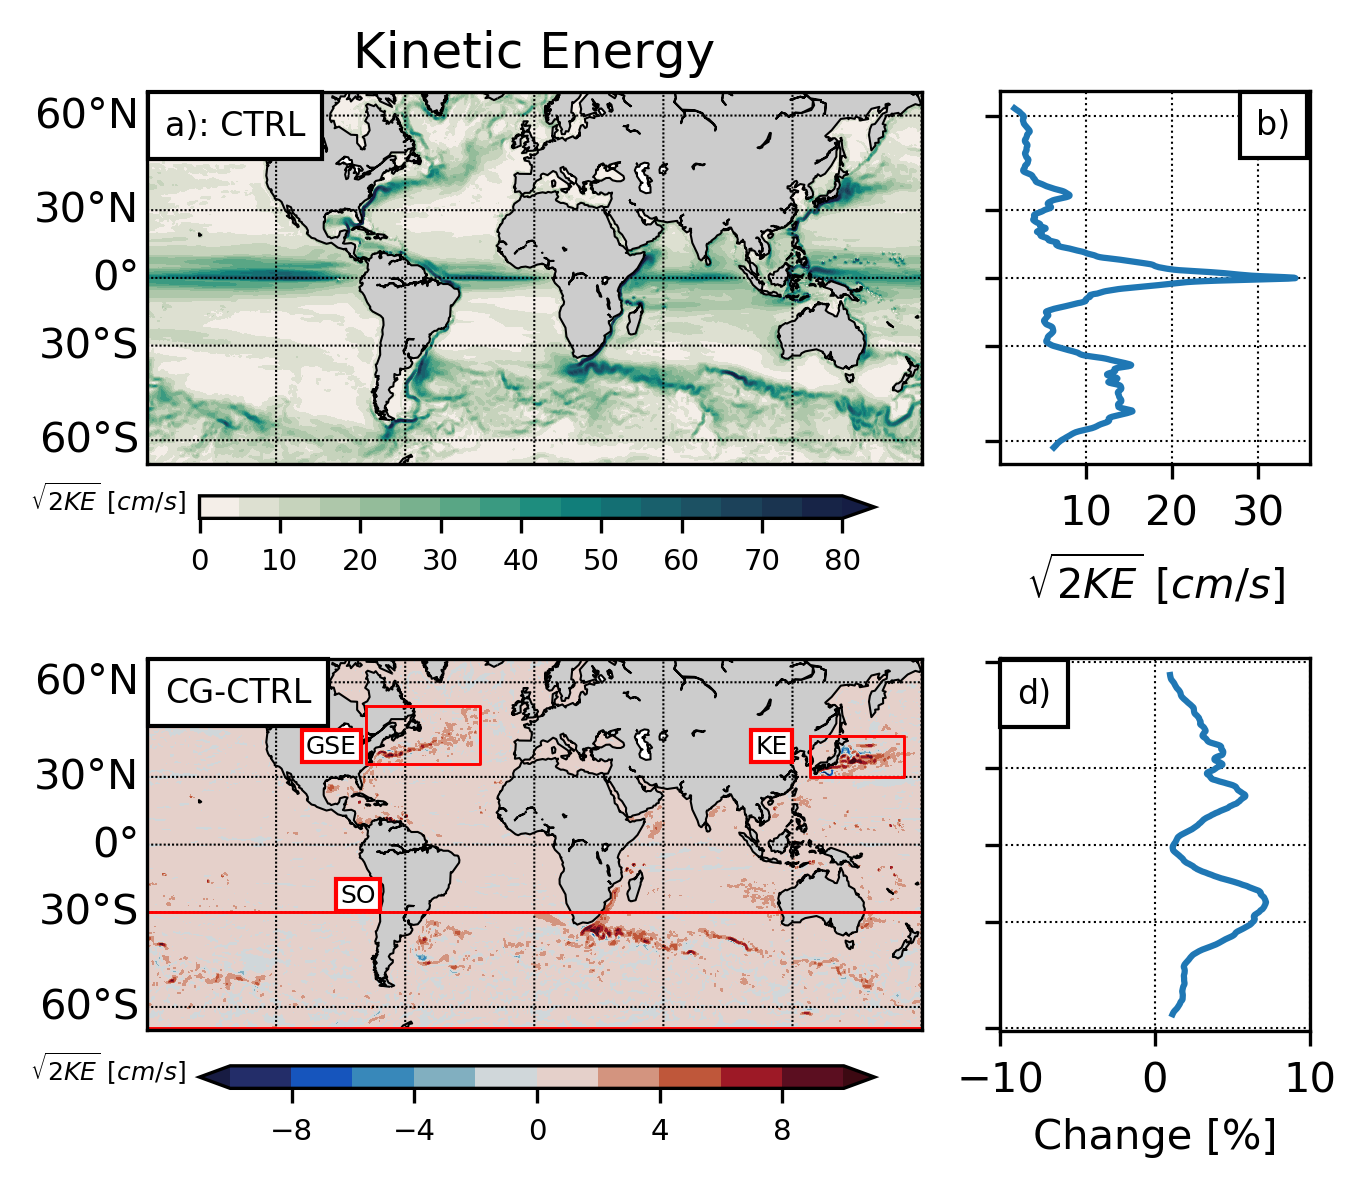

In [7]:
m = Basemap(projection='merc',llcrnrlat=-65,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
fig = plt.figure(figsize=(5, 5), dpi=300)
gs = gridspec.GridSpec(200, 150)
#a
ax1 = plt.subplot(gs[0:90, 0:100])
levs = np.arange(0,85,5)
data=np.sqrt(2*(KE.CTRL_eke_100m+KE.CTRL_mke_100m))
plt.title('Kinetic Energy')
cs=plot_func(data,levs,cm.tempo,'max')
cbaxes = fig.add_axes([0.160, 0.55, 0.45, 0.015])
cb = plt.colorbar(cs,cax = cbaxes,orientation="horizontal")
cb.ax.tick_params(labelsize=7)
cb.ax.set_ylabel(r'$\sqrt{2 KE}$ $[cm/s]$',fontsize=6,rotation=0,y=+0.10,labelpad=+22)

#b
ax2 = plt.subplot(gs[12:78, 110:150])
N=4
y1=99
y2=621
x,y=m(lon[y1:y2,:],lat[y1:y2,:]) # 65S - 65N
plt.plot(running_mean_1d(np.nanmean(data[y1:y2,:],1),N),y[:,720])
plt.yticks(y[[8,130,260,390,512],720].tolist())
plt.grid(color='k', ls='dotted', linewidth=0.5)
plt.xlabel(r'$\sqrt{2 KE}$ $[cm/s]$')
ax2.axes.yaxis.set_ticklabels([])

#c
ax3 = plt.subplot(gs[100:190, 0:100])
levs=np.arange(-10,12,2)
data=np.sqrt(2*(KE.CG_eke_100m+KE.CG_mke_100m))-np.sqrt(2*(KE.CTRL_eke_100m+KE.CTRL_mke_100m))
cs=plot_func(data,levs,cm.balance,'both')
x1=-78; x2 =-25; y1=35;y2=54
m.plot([x1,x1,x2,x2,x1],[y2,y1,y1,y2,y2],'-r',latlon=True,linewidth=0.7)
x1=128; x2 =172; y1=30;y2=45
m.plot([x1,x1,x2,x2,x1],[y2,y1,y1,y2,y2],'-r',latlon=True,linewidth=0.7)
x1=-180; x2 =180; y1=-64.5;y2=-30
m.plot([x1,x2],[y1,y1],'-r',latlon=True,linewidth=0.7)
m.plot([x1,x2],[y2,y2],'-r',latlon=True,linewidth=0.7)

cbaxes = fig.add_axes([0.160, 0.17, 0.45, 0.015])
cb = plt.colorbar(cs,cax = cbaxes,orientation="horizontal")
cb.ax.tick_params(labelsize=7)
cb.ax.set_ylabel(r'$\sqrt{2 KE}$ $[cm/s]$',fontsize=6,rotation=0,y=+0.10,labelpad=+22)

#d
ax4 = plt.subplot(gs[112:178, 110:150])
data=np.nanmean(np.sqrt(2*(KE.CG_eke_100m+KE.CG_mke_100m))-np.sqrt(2*(KE.CTRL_eke_100m+KE.CTRL_mke_100m)),1)/\
     np.nanmean(np.sqrt(2*(KE.CTRL_eke_100m+KE.CTRL_mke_100m)),1)*100
N=40
y1=99
y2=621
x,y=m(lon[y1:y2,:],lat[y1:y2,:]) # 65S - 65N
plt.plot(running_mean_1d(data[y1:y2],N),y[:,720])
plt.yticks(y[[8,130,260,390,512],720].tolist())
plt.grid(color='k', ls='dotted', linewidth=0.5)
plt.xlabel(r'Change [%]')
plt.xlim(0,35)
plt.xlim(-10,10)
ax4.axes.yaxis.set_ticklabels([])

i=0.023
j=0.910
plt.text(i,j,'a): CTRL',    ha='left',va='center',transform=ax1.transAxes,bbox={'facecolor':'white'},fontsize=8)
plt.text(i+.805,j,'b)',    ha='left',va='center',transform=ax2.transAxes,bbox={'facecolor':'white'},fontsize=8)
plt.text(i,j,'CG-CTRL',ha='left',va='center',transform=ax3.transAxes,bbox={'facecolor':'white'},fontsize=8)
plt.text(i+.03,j-.005,'d)',ha='left',va='center',transform=ax4.transAxes,bbox={'facecolor':'white'},fontsize=8)

plt.text(0.205, 0.765,'GSE',ha='left',va='center',\
         transform=ax3.transAxes,bbox=dict(facecolor='white',edgecolor='red',pad=1),fontsize=6)
plt.text(0.785, 0.765,'KE',ha='left',va='center',\
         transform=ax3.transAxes,bbox=dict(facecolor='white',edgecolor='red',pad=1),fontsize=6)
plt.text(0.250, 0.365,'SO',ha='left',va='center',\
         transform=ax3.transAxes,bbox=dict(facecolor='white',edgecolor='red',pad=1),fontsize=6)

plt.savefig('fig2_KE.png',dpi=300, transparent=True)

# box means

In [8]:
# box mean
# first 10 levels NOPE, only surface
def box_mean(var1,var2,i1,i2,j1,j2):
    grid_part = grid[j1:j2,i1:i2]
    diff      = np.nansum(np.nansum((var2-var1)[j1:j2,i1:i2] * grid_part,0),0)/np.nansum(grid_part)
    diff_perc = diff / (np.nansum(np.nansum((var1[j1:j2,i1:i2]) * grid_part,0),0)\
                        /np.nansum(grid_part)) *100 # in %
    return diff, diff_perc

grid      = (e1t * e2t *ORCA025_ocean)

In [10]:
ORCA025_CTRL_mke_100m = KE.ORCA025_CTRL_mke_100m
ORCA025_CTRL_eke_100m = KE.ORCA025_CTRL_eke_100m
ORCA025_CG_mke_100m   = KE.ORCA025_CG_mke_100m
ORCA025_CG_eke_100m   = KE.ORCA025_CG_eke_100m

# currently not working on this machine
# ORCA025_CTRL_ke_100m  = ORCA025_CTRL_mke_100m + ORCA025_CTRL_eke_100m
# ORCA025_CG_ke_100m    = ORCA025_CG_mke_100m   + ORCA025_CG_eke_100m

<xarray.Variable ()>
array(45.106873) <xarray.Variable ()>
array(35.196102)
<xarray.Variable ()>
array(-24.94224) <xarray.Variable ()>
array(-77.598869)
7.679444061664994
10.045571690939282


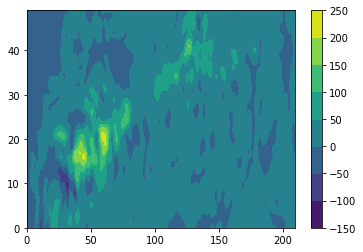

In [11]:
# GSE box
i1=840
i2=1050
j1=650
j2=700
print(nav_lat[j1:j2,i1:i2].max(), nav_lat[j1:j2,i1:i2].min())
print(nav_lon[j1:j2,i1:i2].max(), nav_lon[j1:j2,i1:i2].min())
plt.contourf(ORCA025_CG_eke_100m[j1:j2,i1:i2]-ORCA025_CTRL_eke_100m[j1:j2,i1:i2])
plt.colorbar()

# KE_diff, KE_diff_percent = box_mean(ORCA025_CTRL_ke_100m,ORCA025_CG_ke,i1,i2,j1,j2)
KE_eke_diff, KE_eke_diff_percent = box_mean(ORCA025_CTRL_eke_100m,ORCA025_CG_eke_100m,i1,i2,j1,j2)
KE_mke_diff, KE_mke_diff_percent = box_mean(ORCA025_CTRL_mke_100m,ORCA025_CG_mke_100m,i1,i2,j1,j2)

# print(KE_diff_percent.mean())
print(KE_mke_diff_percent.mean())
print(KE_eke_diff_percent.mean())

<xarray.Variable ()>
array(45.105648) <xarray.Variable ()>
array(29.071531)
<xarray.Variable ()>
array(172.499451) <xarray.Variable ()>
array(128.378723)
4.050282784004218
12.122338515540823


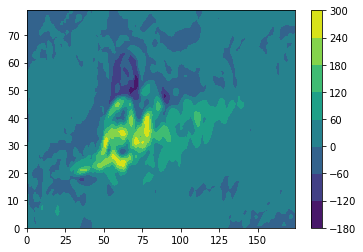

In [12]:
# KE box
i1=225
i2=400
j1=620
j2=700
print(nav_lat[j1:j2,i1:i2].max(), nav_lat[j1:j2,i1:i2].min())
print(nav_lon[j1:j2,i1:i2].max(), nav_lon[j1:j2,i1:i2].min())
plt.contourf(ORCA025_CG_eke_100m[j1:j2,i1:i2]-ORCA025_CTRL_eke_100m[j1:j2,i1:i2])
plt.colorbar()

# KE_diff, KE_diff_percent = box_mean(ORCA025_CTRL_ke_100m,ORCA025_CG_ke,i1,i2,j1,j2)
KE_eke_diff, KE_eke_diff_percent = box_mean(ORCA025_CTRL_eke_100m,ORCA025_CG_eke_100m,i1,i2,j1,j2)
KE_mke_diff, KE_mke_diff_percent = box_mean(ORCA025_CTRL_mke_100m,ORCA025_CG_mke_100m,i1,i2,j1,j2)

# print(KE_diff_percent.mean())
print(KE_mke_diff_percent.mean())
print(KE_eke_diff_percent.mean())

<xarray.Variable ()>
array(-30.023445) <xarray.Variable ()>
array(-65.288567)
<xarray.Variable ()>
array(180.) <xarray.Variable ()>
array(-179.75)
3.0208019814753597
8.086023797875006


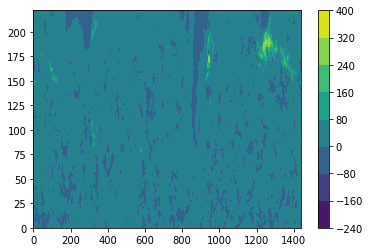

In [13]:
# SO
i1=0
i2=1441
j1=150
j2=373
print(nav_lat[j1:j2,i1:i2].max(), nav_lat[j1:j2,i1:i2].min())
print(nav_lon[j1:j2,i1:i2].max(), nav_lon[j1:j2,i1:i2].min())
plt.contourf(ORCA025_CG_eke_100m[j1:j2,i1:i2]-ORCA025_CTRL_eke_100m[j1:j2,i1:i2])
plt.colorbar()

# KE_diff, KE_diff_percent = box_mean(ORCA025_CTRL_ke_100m,ORCA025_CG_ke,i1,i2,j1,j2)
KE_eke_diff, KE_eke_diff_percent = box_mean(ORCA025_CTRL_eke_100m,ORCA025_CG_eke_100m,i1,i2,j1,j2)
KE_mke_diff, KE_mke_diff_percent = box_mean(ORCA025_CTRL_mke_100m,ORCA025_CG_mke_100m,i1,i2,j1,j2)

# print(KE_diff_percent.mean())
print(KE_mke_diff_percent.mean())
print(KE_eke_diff_percent.mean())

<xarray.Variable ()>
array(89.947868) <xarray.Variable ()>
array(-77.010475)
<xarray.Variable ()>
array(180.) <xarray.Variable ()>
array(-180.)
2.5204823880827987
6.4054653007447975


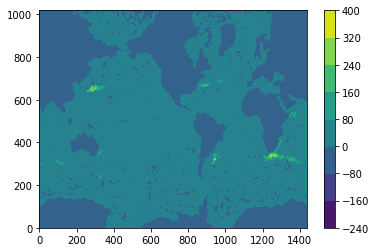

In [14]:
# Global
i1=0
i2=1441
j1=0
j2=1020
print(nav_lat[j1:j2,i1:i2].max(), nav_lat[j1:j2,i1:i2].min())
print(nav_lon[j1:j2,i1:i2].max(), nav_lon[j1:j2,i1:i2].min())
plt.contourf(ORCA025_CG_eke_100m[j1:j2,i1:i2]-ORCA025_CTRL_eke_100m[j1:j2,i1:i2])
plt.colorbar()

# KE_diff, KE_diff_percent = box_mean(ORCA025_CTRL_ke_100m,ORCA025_CG_ke,i1,i2,j1,j2)
KE_eke_diff, KE_eke_diff_percent = box_mean(ORCA025_CTRL_eke_100m,ORCA025_CG_eke_100m,i1,i2,j1,j2)
KE_mke_diff, KE_mke_diff_percent = box_mean(ORCA025_CTRL_mke_100m,ORCA025_CG_mke_100m,i1,i2,j1,j2)

# print(KE_diff_percent.mean())
print(KE_mke_diff_percent.mean())
print(KE_eke_diff_percent.mean())

In [15]:
!conda list

# packages in environment at C:\Users\abelr\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py36_0  
_tflow_select             2.2.0                     eigen  
absl-py                   0.6.1                    py36_0  
alabaster                 0.7.12                   py36_0  
anaconda                  custom           py36h363777c_0  
anaconda-client           1.7.2                    py36_0  
anaconda-navigator        1.9.6                    py36_0  
anaconda-project          0.8.2                    py36_0  
asn1crypto                0.24.0                   py36_0  
astor                     0.7.1                    py36_0  
astroid                   2.1.0                    py36_0  
astropy                   3.1              py36he774522_0  
atomicwrites              1.2.1                    py36_0  
attrs                     18.2.0           py36h28b3542_0  
babel                     2.6.0     

In [16]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: win-64
@EXPLICIT
https://repo.anaconda.com/pkgs/main/win-64/_tflow_select-2.2.0-eigen.tar.bz2
https://repo.anaconda.com/pkgs/main/win-64/blas-1.0-mkl.tar.bz2
https://repo.anaconda.com/pkgs/main/win-64/ca-certificates-2018.03.07-0.tar.bz2
https://repo.anaconda.com/pkgs/main/win-64/conda-env-2.6.0-1.tar.bz2
https://repo.anaconda.com/pkgs/main/win-64/icc_rt-2019.0.0-h0cc432a_1.tar.bz2
https://repo.anaconda.com/pkgs/main/win-64/intel-openmp-2019.1-144.tar.bz2
https://repo.anaconda.com/pkgs/msys2/win-64/msys2-conda-epoch-20160418-1.tar.bz2
https://repo.anaconda.com/pkgs/main/win-64/pandoc-2.2.3.2-0.tar.bz2
https://repo.anaconda.com/pkgs/main/win-64/vs2015_runtime-14.15.26706-h3a45250_0.tar.bz2
https://repo.anaconda.com/pkgs/main/win-64/winpty-0.4.3-4.tar.bz2
https://repo.anaconda.com/pkgs/msys2/win-64/m2w64-gmp-6.1.0-2.tar.bz2
https://repo.anaconda.com/pkgs/msys2/win-64/m2w64